<a href="https://colab.research.google.com/github/olesia-za/python_for_ds_tasks/blob/main/OZ_Done_M16_HW1_Rent_payment_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [8]:
df = pd.read_csv('../data/House_Rent_Dataset.csv')

display(df.shape)
df.head()

(4746, 12)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


In [12]:
# Найзручніший спосіб виявити пропущені значення і їх відсоток в кожній з колонок.
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_percent

Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64

In [68]:
df.describe().round(2)

,BHK,Rent,Size,Bathroom,log_target
count,4746.00,4746.00,4746.00,4746.00,4746.00
mean,2.08,34993.45,967.49,1.97,9.88
std,0.83,78106.41,634.20,0.88,0.94
min,1.00,1200.00,10.00,1.00,7.09
25%,2.00,10000.00,550.00,1.00,9.21
50%,2.00,16000.00,850.00,2.00,9.68
75%,3.00,33000.00,1200.00,2.00,10.40
max,6.00,3500000.00,8000.00,10.00,15.07


In [10]:
df.describe(include='all')

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,3,2235,6,3,3,NaN,3
top,2022-07-06,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2446,37,972,2251,3444,NaN,3216
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


In [13]:
# Фільтруємо дані без пропусків у лайках
# df_clean = df[df['likes_count'].notna()].copy()

# Розподіл лайків
fig = px.histogram(
    df['Rent'],
    x='Rent',
    nbins=100,
    title='Розподіл цільової змінної (Rent)',
    labels={'Rent': 'Вартість оренди', 'count': 'Кількість пропозицій'}
)
fig.update_layout(
    showlegend=False,
    height=400
)
fig.show()

In [14]:
df['log_target'] = np.log1p(df['Rent'])
fig = px.histogram(
    df['log_target'],
    x='log_target',
    nbins=100,
    title='Розподіл цільової змінної (Rent)',
    labels={'Rent': 'Вартість оренди', 'count': 'Кількість пропозицій'}
)
fig.update_layout(
    showlegend=False,
    height=400
)
fig.show()

In [17]:
fig = px.box(
    df['Rent'],
    x='Rent',
    title='Розподіл цільової змінної (Rent)',
    labels={'Rent': 'Вартість оренди', 'count': 'Кількість пропозицій'}
)
fig.update_layout(
    showlegend=False,
    height=400
)
fig.show()

In [18]:
df['Rent'][df['Rent']<=80000].count()

np.int64(4348)

In [19]:
# Calculate IQR
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame
df_no_outliers = df[(df['Rent'] >= lower_bound) & (df['Rent'] <= upper_bound)]

In [22]:
fig = px.box(
    df_no_outliers['Rent'],
    x='Rent',
    title='Розподіл цільової змінної (Rent)',
    labels={'Rent': 'Вартість оренди', 'count': 'Кількість пропозицій'}
)
fig.update_layout(
    showlegend=False,
    height=400
)
fig.show()

In [21]:
df_no_outliers.shape

(4226, 13)

In [70]:
df.select_dtypes(include=['object', 'category']).nunique()

Posted On              81
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Point of Contact        3
dtype: int64

In [24]:
df_no_outliers.select_dtypes(include=['object', 'category']).nunique()

Posted On              80
Floor                 340
Area Type               3
Area Locality        1997
City                    6
Furnishing Status       3
Tenant Preferred        3
Point of Contact        3
dtype: int64


## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


In [72]:
# Створюємо датафрейм тільки з числовими метриками
metrics_df = df_no_outliers[['Rent', 'BHK', 'Size', 'Bathroom']].dropna()

# Матриця кореляцій
correlation_matrix = metrics_df.corr()

# Візуалізація кореляцій
fig = px.imshow(
    correlation_matrix,
    text_auto='.2f',
    color_continuous_scale='RdBu_r',
    title='Кореляція між метриками взаємодії',
    labels=dict(color="Кореляція")
)
fig.update_layout(height=500)
fig.show()
# є помірна позитивна кореляція між розміром житла та вартістю оренди, між кількістю кімнат та вартістю оренди, між кількістю ванних кімнат та вартістю оренди

In [73]:
# Кореляція між цільовою змінною та іншими числовими метриками
fig = px.scatter(
    df_no_outliers['Rent'],
    df_no_outliers['Size'],
    title='Кореляція між Rent та Size',
    labels={'y': 'Rent', 'x': 'Size'},
    trendline='ols'
)
fig.update_layout(height=500)
fig.show()
# є помірна позитивна кореляція між розміром житла та вартістю оренди

In [74]:
# Кореляція між цільовою змінною та іншими числовими метриками
fig = px.scatter(
    df_no_outliers['Rent'],
    df_no_outliers['BHK'],
    title='Кореляція між Rent та BHK',
    labels={'y': 'Rent', 'x': 'BHK'},
    trendline='ols'
)
fig.update_layout(height=500)
fig.show()
# є помірна позитивна кореляція між кількістю кімнат та вартістю оренди

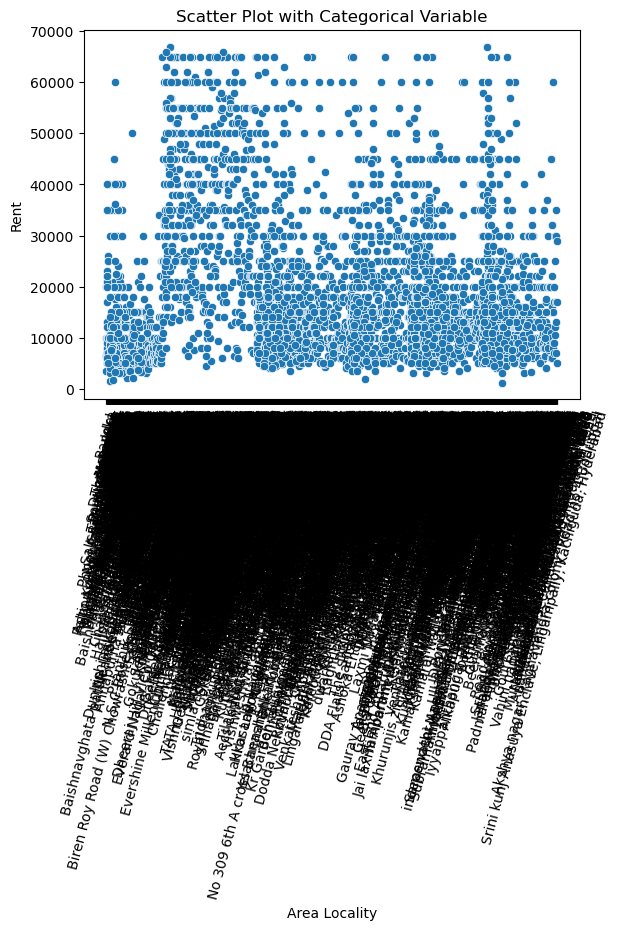

In [75]:
# Кореляція між цільовою змінною та іншими числовими метриками
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(x='Area Locality', y='Rent', data=df_no_outliers)

plt.title("Scatter Plot with Categorical Variable")
plt.xticks(rotation=75)
plt.show();

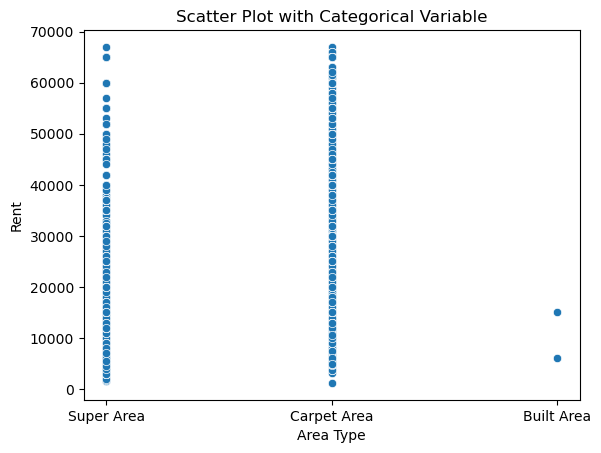

In [76]:
# Кореляція між цільовою змінною та іншими числовими метриками
# Scatter plot
sns.scatterplot(x='Area Type', y='Rent', data=df_no_outliers)

plt.title("Scatter Plot with Categorical Variable")
plt.show();

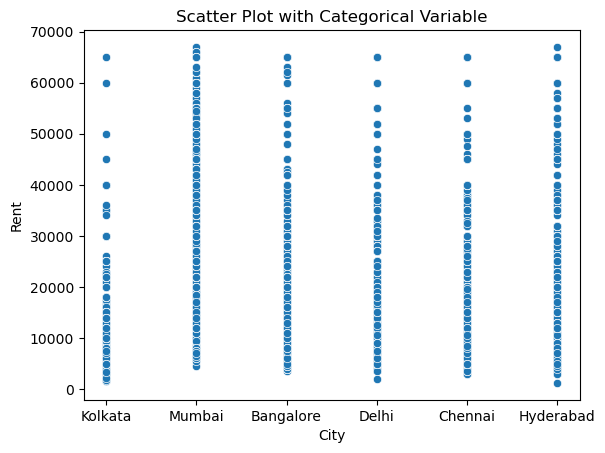

In [77]:
# Кореляція між цільовою змінною та іншими числовими метриками
# Scatter plot
sns.scatterplot(x='City', y='Rent', data=df_no_outliers)

plt.title("Scatter Plot with Categorical Variable")
plt.show();

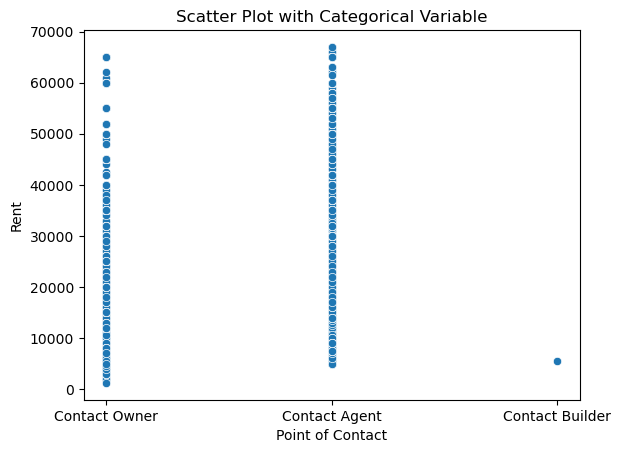

In [78]:
# Кореляція між цільовою змінною та іншими числовими метриками
# Scatter plot
sns.scatterplot(x='Point of Contact', y='Rent', data=df_no_outliers)

plt.title("Scatter Plot with Categorical Variable")
plt.show();

In [79]:
df_no_outliers['Point of Contact'].value_counts()

Point of Contact
Contact Owner      3168
Contact Agent      1057
Contact Builder       1
Name: count, dtype: int64

## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


In [84]:
df_no_outliers.head(20)
df_no_outliers.groupby(['Furnishing Status']).agg({'Rent': 'mean', 'Size': 'mean', 'BHK': 'mean', 'Bathroom': 'mean'}).round(2)

,Rent,Size,BHK,Bathroom
Furnishing Status,,,,
Furnished,24827.90,898.83,1.94,1.87
Semi-Furnished,20392.36,961.86,2.07,1.92
Unfurnished,16338.19,759.82,1.84,1.66


In [87]:
df_no_outliers.groupby(['Area Locality']).agg({'Rent': 'mean', 'Rent':'count', 'Size': 'mean', 'BHK': 'mean', 'Bathroom': 'mean'}).round(2).sort_values(by='Rent', ascending=False)
# 0   Posted On          4746 non-null   object  2) moth column(4 One-Hot) and day 0-1 - work or weekend(2 One-Hot)
#  1   BHK                4746 non-null   int64    should be normalized
#  2   Rent               4746 non-null   int64 
#  3   Size               4746 non-null   int64    should be normalized
#  4   Floor              4746 non-null   object  8) flor +2 One-Hot + building type +3 One-Hot
#  5   Area Type          4746 non-null   object  3)One-Hot Encoding +3
#  6   Area Locality      4746 non-null   object  7) changed to mean rent and normalized
#  7   City               4746 non-null   object  1)One-Hot Encoding +6
#  8   Furnishing Status  4746 non-null   object  5)One-Hot Encoding +3
#  9   Tenant Preferred   4746 non-null   object  4)One-Hot Encoding +3
#  10  Bathroom           4746 non-null   int64     should be normalized
#  11  Point of Contact   4746 non-null   object  6)One-Hot Encoding +2 and remove 1 value
#  12  log_target         4746 non-null   float64

,Rent,Size,BHK,Bathroom
Area Locality,,,,
Gachibowli,28,1620.93,2.57,2.57
Electronic City,24,892.67,1.92,1.71
Velachery,22,937.82,1.91,1.86
"Miyapur, NH 9",22,1273.23,2.32,2.23
Laxmi Nagar,19,534.74,1.84,1.37
...,...,...,...,...
2 BHK,1,600.00,2.00,2.00
"117 Residency, Chembur East",1,650.00,2.00,2.00
"in Miyapur, NH 9",1,1550.00,3.00,2.00


In [88]:
df_no_outliers.groupby(['Area Locality']).agg({'Rent': 'mean', 'Size': 'mean'}).round(2).sort_values(by='Rent', ascending=False)


,Rent,Size
Area Locality,,
"Dodda Nekkundi Extension, Kartik Nagar, Outer Ring Road",65000.0,1480.0
"Dosti Ambrosia, Wadala East",65000.0,960.0
"Dr Babasaheb Ambedkar Road, Mumbai",65000.0,550.0
"Ganpat Niketan Apartment, Khar West",65000.0,750.0
"Hillcrest, Chakala MIDC",65000.0,1105.0
...,...,...
Bhawanipur,3200.0,800.0
Hatiara,3000.0,500.0
Ennore,3000.0,350.0


In [90]:
df_no_outliers.groupby(['Floor']).agg({'Rent': 'mean', 'Size': 'mean'}).round(2).sort_values(by='Rent', ascending=False)

,Rent,Size
Floor,,
9 out of 28,65000.0,950.00
12 out of 14,65000.0,800.00
8 out of 58,65000.0,805.00
14 out of 17,65000.0,600.00
23 out of 40,65000.0,2000.00
...,...,...
Upper Basement out of 2,8500.0,475.00
19 out of 20,8000.0,416.00
Upper Basement out of 4,7500.0,266.67


In [83]:
# One-Hot Encoding для платформи
furnishing_dummies = pd.get_dummies(df_no_outliers['Furnishing Status'], prefix='furnishing').astype('int')
furnishing_dummies.head()

,furnishing_Furnished,furnishing_Semi-Furnished,furnishing_Unfurnished
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)